# Data nesting with datalad

In [ ]:
# Update git annex version that is compatible with datalad
!wget -O- http://neuro.debian.net/lists/bionic.us-nh.full | tee /etc/apt/sources.list.d/neurodebian.sources.list \
 && export GNUPGHOME="$(mktemp -d)" \
 && echo "disable-ipv6" >> ${GNUPGHOME}/dirmngr.conf \
 && (apt-key adv --homedir $GNUPGHOME --recv-keys --keyserver hkp://pgpkeys.eu 0xA5D32F012649A5A9 \
|| { curl -sSL http://neuro.debian.net/_static/neuro.debian.net.asc | apt-key add -; } ) \
 && apt-get update \
 && apt-get install git-annex-standalone git
!git config --global user.name "mo"
!git config --global user.email "myatmo@outlook.com"
# Install datalad
!pip install datalad
!pip install scikit-image==0.19.2


--2022-09-15 16:36:07--  http://neuro.debian.net/lists/bionic.us-nh.full
Resolving neuro.debian.net (neuro.debian.net)... 129.170.233.11
Connecting to neuro.debian.net (neuro.debian.net)|129.170.233.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262
Saving to: ‘STDOUT’

deb http://neuro.debian.net/debian data main contrib non-free
#deb-src http://neuro.debian.net/debian data main contrib non-free
deb http://neuro.debian.net/debian bionic main contrib non-free
#deb-src http://neuro.debian.net/debian bionic main contrib non-free
-                   100%[===================>]     262  --.-KB/s    in 0s      

2022-09-15 16:36:07 (28.1 MB/s) - written to stdout [262/262]

Executing: /tmp/apt-key-gpghome.93DfUFsbvx/gpg.1.sh --homedir /tmp/tmp.2rD0TKH2Xp --recv-keys --keyserver hkp://pgpkeys.eu 0xA5D32F012649A5A9
gpg: key A5D32F012649A5A9: public key "NeuroDebian Archive Key <pkg-exppsy-maintainers@lists.alioth.debian.org>" imported
gpg: Total number processed: 1

In [ ]:
# Check git version
!git --version

# Check datalad version
!datalad --version

# Check git annex version
!git-annex version

In [ ]:
# Mounting google drive to access images
from google.colab import drive
drive.mount('/content/drive')

# Load the (desired) directory
%cd drive/MyDrive/Colab Notebooks/UMII/Zooniverse

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse


In [ ]:
# Only need to run this onece
#!datalad clone https://github.com/tp81/umii-fatchecker-dataset.git

In [ ]:
# Specify a dataset to work with by providing its path via the `dataset` option, or change the current working directory to be in a dataset.
%cd umii-fatchecker-dataset

/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset


In [ ]:
#!datalad status

nothing to save, working tree clean


In [ ]:
#!datalad status --annex

In [ ]:
#!datalad get masks/50494616.png
#PATH [umii-fatchecker-dataset]

# Import libraires

In [ ]:
import datalad.api as dl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
import glob
import math
import skimage
import json
import plotly.express as px
import pandas as pd
import numpy as np


In [ ]:
# make sure skimage version is 0.19.2
assert skimage.__version__ == '0.19.2'

# Visualize the images

In [ ]:
# get the content of an image and visualize it
def visualize_image(filename):
  #dl.get(filename) # get the image content with datalad
  img = mpimg.imread(filename) # read image
  plt.imshow(img, cmap='gray') # show the image
  plt.show()

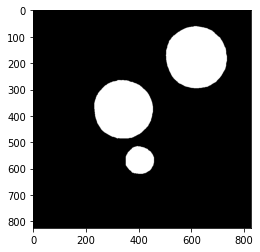

In [ ]:
mask1 = "masks/50494617.png"
visualize_image(mask1)

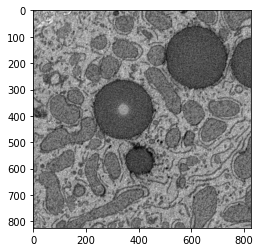

In [ ]:
org1 = "images/50494617.jpg"
visualize_image(org1)

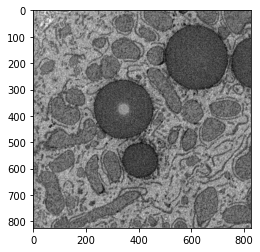

In [ ]:
visualize_image("images/50494616.jpg")

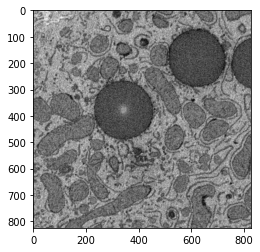

In [ ]:
visualize_image("images/50494620.jpg")

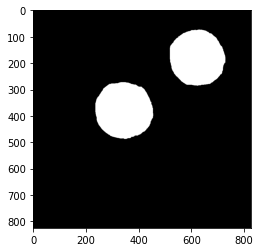

In [ ]:
visualize_image("masks/50494620.png")

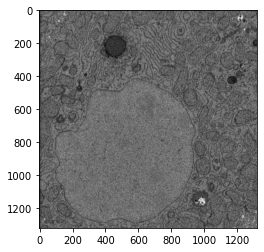

In [ ]:
visualize_image("images/50494628.jpg")

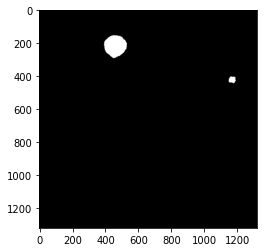

In [ ]:
visualize_image("masks/50494628.png")

# Data splitting

In [ ]:
#ds_path = '/content/drive/MyDrive/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset'
ds_path = os.getcwd()
ds = dl.Dataset(ds_path)
#ds_mask = dl.Dataset('masks')
#ds.status(annex='all')


In [ ]:
# get all the file path name
image_file_list = glob.glob(os.path.join(ds_path, 'images') + '/*jpg')
mask_file_list = glob.glob(os.path.join(ds_path, 'masks') + '/*png')

# sort the file name
image_file_list.sort()
mask_file_list.sort()

In [ ]:
print("number of images: ", len(image_file_list))
print("number of masked images: ", len(mask_file_list))

number of images:  2341
number of masked images:  2341


In [ ]:
image_file_list[:5]

['/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/images/50494616.jpg',
 '/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/images/50494617.jpg',
 '/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/images/50494618.jpg',
 '/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/images/50494619.jpg',
 '/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/images/50494620.jpg']

In [ ]:
mask_file_list[:5]

['/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/masks/50494616.png',
 '/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/masks/50494617.png',
 '/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/masks/50494618.png',
 '/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/masks/50494619.png',
 '/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/masks/50494620.png']

In [ ]:
# check all the images are downloaded and accessable
# data_set: list of file names
# file_type: either images or masks
def check_data(data_set, file_type):
  for i in range(len(data_set[file_type])):
    filename = data_set[file_type][i]
    try:
      img = mpimg.imread(filename)
      #print(i, img.shape)
    except:
      print(i, 'Invalid image file')
      #break

In [ ]:
# to do: run this before augmentation
# Check all the images have corresponding masks images
for i in range(len(image_file_list)):
  img_name = os.path.basename(image_file_list[i]).strip('.jpg')
  mask_name = os.path.basename(mask_file_list[i]).strip('.png')
  assert img_name == mask_name, "Mismatch Found!"


In [ ]:
for i in range(len(image_file_list)):
  img = mpimg.imread(image_file_list[i])
  mask = mpimg.imread(mask_file_list[i])
  assert img.shape[:2] == mask.shape, "Mismatch Dimension Found!"

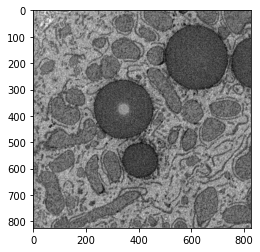

In [ ]:
visualize_image(image_file_list[0])

In [ ]:
# ds_path = os.getcwd()
# target_dir_img = os.path.join(ds_path, 'Train/images')
# target_dir_mask = os.path.join(ds_path, 'Train/masks')
# for i in range(len(training_set['images'])):
#   print(i)
#   dl.copy_file(training_set['images'][i], target_dir=target_dir_img)
#   dl.copy_file(training_set['masks'][i], target_dir=target_dir_mask)

# target_dir_img = os.path.join(ds_path, 'Test/images')
# target_dir_mask = os.path.join(ds_path, 'Test/masks')
# for i in range(len(test_set['images'])):
#   dl.copy_file(test_set['images'][i], target_dir=target_dir_img)
#   dl.copy_file(test_set['masks'][i], target_dir=target_dir_mask)


In [ ]:
# downsample the images and calculate normalized_mutual_information between 2 images


## Normalized Mutual Information

In [ ]:
# visualize two images side by side and two mask images
def show_image_pairs(n1, n2):
  img1 = mpimg.imread(image_file_list[n1])
  img2 = mpimg.imread(image_file_list[n2])
  mask1 = mpimg.imread(mask_file_list[n1])
  mask2 = mpimg.imread(mask_file_list[n2])
  fig, ax = plt.subplots(nrows=2, ncols=2)
  ax[0][0].imshow(img1, cmap='gray')
  ax[0][1].imshow(img2, cmap='gray')
  ax[1][0].imshow(mask1, cmap='gray')
  ax[1][1].imshow(mask2, cmap='gray')
  plt.show()


In [ ]:
target_size = (256,256,3)
# calculate normalized mutual information between 2 images
# return: float value; the higher the value the more similar the two images are
def calculate_nmi(file1, file2, target_size=(256,256,3)):
  img1 = skimage.io.imread(file1)
  img2 = skimage.io.imread(file2)
  img1_scaled = skimage.transform.resize(img1, target_size)
  img2_scaled = skimage.transform.resize(img2, target_size)
  nmi = skimage.metrics.normalized_mutual_information(img1_scaled, img2_scaled)
  return nmi

In [ ]:
print(calculate_nmi(image_file_list[0], image_file_list[0]))
print(calculate_nmi(mask_file_list[0], mask_file_list[0]))

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


1.9999999999999996
1.9999999999999996


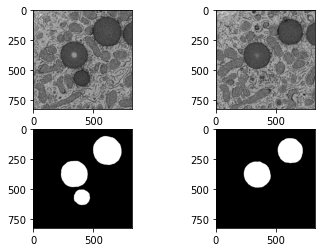

In [ ]:
show_image_pairs(0, 5)


In [ ]:
print(calculate_nmi(image_file_list[0], image_file_list[5]))
print(calculate_nmi(mask_file_list[0], mask_file_list[5]))

1.0240585210155668
1.4176462655255029


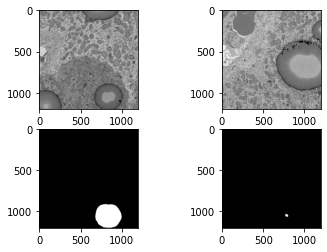

In [ ]:
show_image_pairs(1629, 1630)

In [ ]:
print(calculate_nmi(image_file_list[1629], image_file_list[1630]))
print(calculate_nmi(mask_file_list[1629], mask_file_list[1630]))

1.0096304711797983
1.0118715298160657


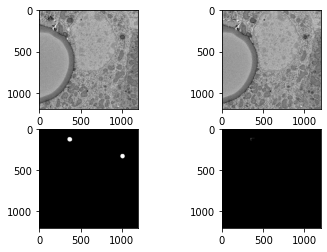

In [ ]:
show_image_pairs(1976, 1977)

In [ ]:
print(calculate_nmi(image_file_list[1976], image_file_list[1977]))
print(calculate_nmi(mask_file_list[1976], mask_file_list[1977]))

1.075637718958837
1.1451569715724372


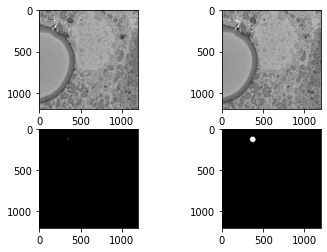

In [ ]:
show_image_pairs(1977, 1978)

In [ ]:
print(calculate_nmi(image_file_list[1977], image_file_list[1978]))
print(calculate_nmi(mask_file_list[1977], mask_file_list[1978]))

1.0743944819495486
1.1724241219903495


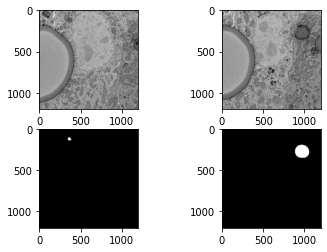

In [ ]:
i = 1993
show_image_pairs(i, i+1)

In [ ]:
print(calculate_nmi(image_file_list[i], image_file_list[i+1]))
print(calculate_nmi(mask_file_list[i], mask_file_list[i+1]))

1.0213164323094441
1.0001785743881477


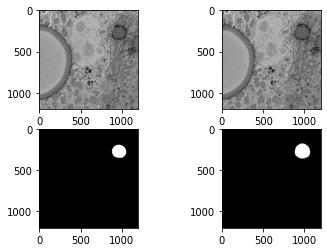

In [ ]:
i = 1994
show_image_pairs(i, i+1)

In [ ]:
print(calculate_nmi(image_file_list[i], image_file_list[i+1]))
print(calculate_nmi(mask_file_list[i], mask_file_list[i+1]))

1.0925900213636808
1.5912717578801974


(1.0268181248879038, 1.7317039506981868)

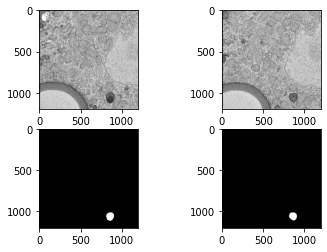

In [ ]:
i = 85
show_image_pairs(i, i+1)
(calculate_nmi(image_file_list[i], image_file_list[i+1]),
calculate_nmi(mask_file_list[i], mask_file_list[i+1]))

(1.0358869370055521, 1.0012834508822772)

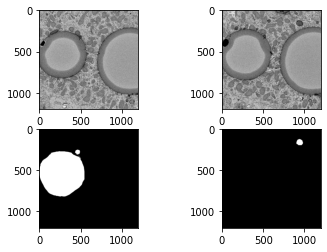

In [ ]:
i = 1497
show_image_pairs(i, i+1)
(calculate_nmi(image_file_list[i], image_file_list[i+1]),
calculate_nmi(mask_file_list[i], mask_file_list[i+1]))

(1.0744618011172506, 1.0119492307416134)

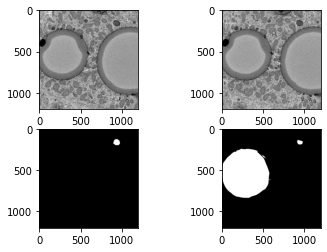

In [ ]:
i = 1498
j = i + 1
show_image_pairs(i, j)
(calculate_nmi(image_file_list[i], image_file_list[j]),
calculate_nmi(mask_file_list[i], mask_file_list[j]))

2.2924683574487146

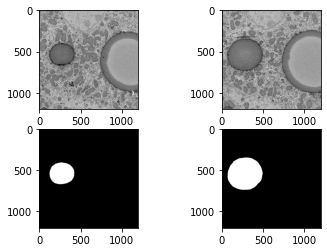

In [ ]:
i = 1460
j = 1470
show_image_pairs(i, j)
calculate_nmi(image_file_list[i], image_file_list[j]) + calculate_nmi(mask_file_list[i], mask_file_list[j])

In [ ]:
# save values in json file
def save_as_json(file_list, file_name):
  myfile = open( file_name + ".json", "w")
  json.dump(file_list, myfile, indent=6)
  myfile.close()

In [ ]:
# calculate normalized mutual information of image pairs
def get_nmi_values(image_file_list, mask_file_list):
  nmi_img = []
  nmi_mask = []
  for i in range(len(image_file_list)-1):
    nmi_img.append( calculate_nmi(image_file_list[i], image_file_list[i+1]) )
    nmi_mask.append( calculate_nmi(mask_file_list[i], mask_file_list[i+1]) )
    
  # save nmi_values list in json file
  nmi_list = {"images": nmi_img,
                      "masks": nmi_mask}             
  save_as_json(nmi_list, "nmi_img_mask_list")

  #return nmi_img, nmi_mask


In [ ]:
#get_nmi_values(image_file_list, mask_file_list)

In [ ]:
# load saved nmi_values list
def load_json_file(file_name):
  myfile = open(file_name + ".json")
  loaded_file = json.load(myfile)
  return loaded_file

In [ ]:
nmi_list = load_json_file("nmi_img_mask_list")

In [ ]:
nmi_img = nmi_list["images"]
nmi_mask = nmi_list["masks"]

In [ ]:
# sum of nmi_val_img and nmi_val_mask
nmi_combined = list(np.array(nmi_img) + np.array(nmi_mask))
len(nmi_combined)

2340

In [ ]:
#split_data_into_stacks(image_file_list, mask_file_list, nmi_list)

In [ ]:
# load saved image_stacks list
image_stacks = load_json_file("stack_list")["id"]

In [ ]:
len(image_stacks)

43

### Visualize values

In [ ]:

def visualize_nmi_values(values):
  df = pd.DataFrame(dict(
      image_id = [i for i in range(len(values))],
      values = values
  ))
  fig = px.line(df, x="image_id", y="values", title="") 
  fig.show()

In [ ]:
visualize_nmi_values(nmi_combined)

In [ ]:
visualize_nmi_values(nmi_img)

In [ ]:
visualize_nmi_values(nmi_mask)

### Summary of nmi values

In [ ]:
df = pd.DataFrame(dict(
      image_id = [i for i in range(len(nmi_img))],
      nmi_img = nmi_img,
      nmi_mask = nmi_mask,
      nmi_combined = nmi_combined
  ))
fig = px.line(df, x="image_id", y=["nmi_img", "nmi_mask", "nmi_combined"])
fig.show()

In [ ]:
# save nmi_values list in json file
df.to_csv('df_nmi.csv', index=False)

In [ ]:
(df["nmi_img"].max(),
 df["nmi_img"].min())

(1.161523043856329, 1.0053161382307019)

In [ ]:
(df["nmi_mask"].max(),
 df["nmi_mask"].min())

(1.884101094909104, 1.000013459594167)

## Cross-correlation

In [ ]:
# calculate correlation coefficients between two images
def calculate_corrcoef(file1, file2, target_size=(256,256)):
  img1 = mpimg.imread(file1)
  img2 = mpimg.imread(file2)
  img1 = skimage.transform.resize(img1, target_size)
  img2 = skimage.transform.resize(img2, target_size)
  coef = np.corrcoef(img1.flatten(), img2.flatten())
    
  return coef[0][1]

def get_corrcoef_list(image_file_list, mask_file_list, target_size=(256,256)):
  coef_img_list = []
  coef_mask_list = []
  for i in range(len(image_file_list)-1):
    print(i)
    coef_img = calculate_corrcoef(image_file_list[i], image_file_list[i+1], target_size)
    coef_mask = calculate_corrcoef(mask_file_list[i], mask_file_list[i+1], target_size)
    coef_img_list.append(coef_img)
    coef_mask_list.append(coef_mask)
    
  # save coef list in json file
  coef_list = {"images": coef_img_list,
              "masks": coef_mask_list}
  save_as_json(coef_list, "coef_list")

  #return coef_img_list, coef_mask_list


In [ ]:
#get_corrcoef_list(image_file_list, mask_file_list)


In [ ]:
# load saved coef_file list
coef_list = load_json_file("coef_list")
coef_img = coef_list["images"]
coef_mask = coef_list["masks"]

In [ ]:
coef_combined = list(np.array(coef_img) + np.array(coef_mask))


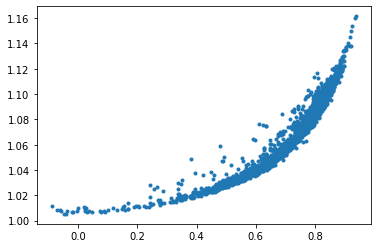

In [ ]:
# nmi values vs coef for images
plt.plot(coef_img, nmi_img, '.')

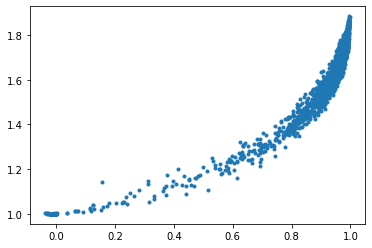

In [ ]:
# nmi values vs coef for masks
plt.plot(coef_mask, nmi_mask, '.')

### Summary of cross-correlation values

In [ ]:
df_coef = pd.DataFrame(dict(
      image_id = [i for i in range(len(coef_img))],
      coef_img = coef_img,
      coef_mask = coef_mask,
      coef_combined = coef_combined
  ))
fig = px.line(df_coef, x="image_id", y=["coef_img", "coef_mask", "coef_combined"])
fig.show()

In [ ]:
df_coef.to_csv('df_coef.csv', index=False)

In [ ]:
coef_nmi_combined = list(np.array(coef_combined) + np.array(nmi_combined))

In [ ]:
df_summary = pd.DataFrame(dict(
      image_id = [i for i in range(len(coef_img))],
      coef_img = coef_img,
      coef_mask = coef_mask,
      coef_combined = coef_combined,
      nmi_img = nmi_img,
      nmi_mask = nmi_mask,
      nmi_combined = nmi_combined,
      coef_nmi_combined = coef_nmi_combined
  ))
fig = px.line(df_summary, x="image_id", y=["coef_img", "coef_mask", "coef_combined",
                                   "nmi_img", "nmi_mask", "nmi_combined", "coef_nmi_combined"])
fig.show()

In [ ]:

def split_data_into_stacks(image_file_list, mask_file_list, values_list, threshold=2.1):
  image_stacks = []
  start = 0
  for i in range(len(image_file_list)-1):
    val = values_list[i]
    if val < threshold:
      image_stacks.append([start, i+1])
      start = i+1
  
  image_stacks.append([start, len(image_file_list)])
  # save image_stacks list in json file
  #stack_list = {"id": image_stacks}
  #save_as_json(stack_list, "stack_list")

  #return image_stacks
  return image_stacks


In [ ]:
threshold = 2.1 # subject to change
image_stacks = split_data_into_stacks(image_file_list, mask_file_list, coef_nmi_combined, threshold)


In [ ]:
len(image_stacks)

20

In [ ]:
image_stacks

[[0, 6],
 [6, 10],
 [10, 60],
 [60, 85],
 [85, 88],
 [88, 148],
 [148, 337],
 [337, 451],
 [451, 472],
 [472, 502],
 [502, 652],
 [652, 719],
 [719, 824],
 [824, 1109],
 [1109, 1383],
 [1383, 1778],
 [1778, 1863],
 [1863, 2023],
 [2023, 2036],
 [2036, 2341]]

0 6


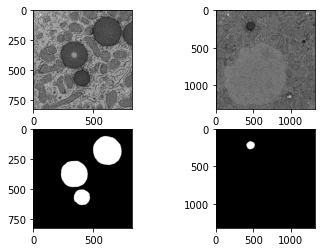

6 10


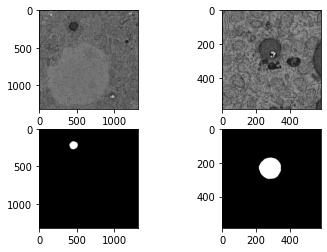

10 60


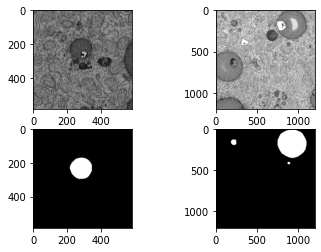

60 85


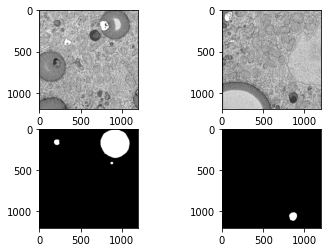

85 87


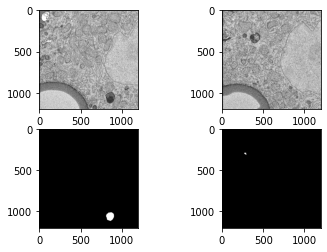

87 88


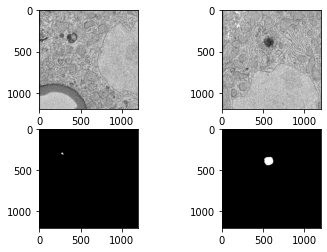

88 141


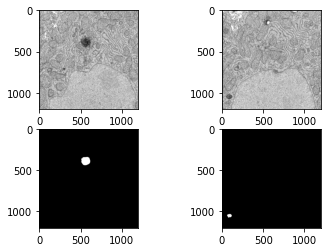

141 145


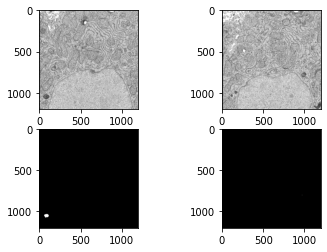

145 148


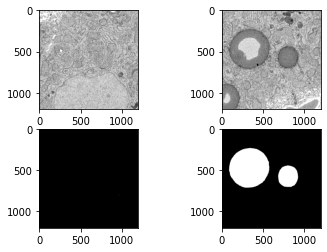

148 337


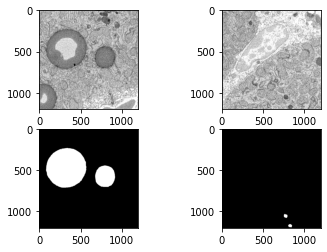

337 338


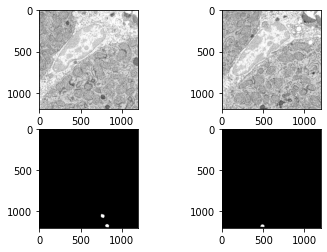

338 339


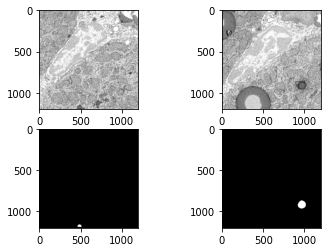

339 355


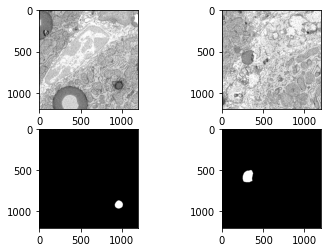

355 361


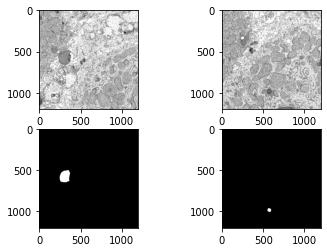

361 444


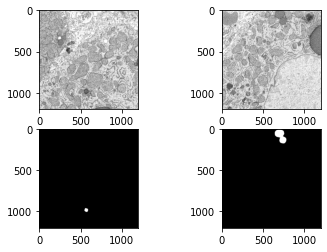

444 451


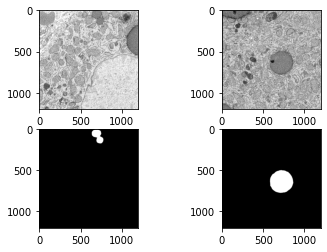

451 472


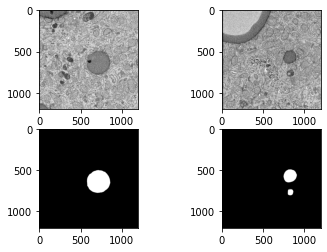

472 502


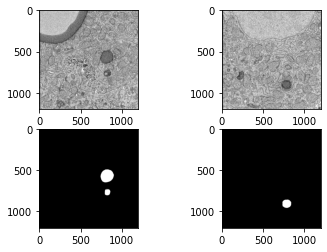

502 538


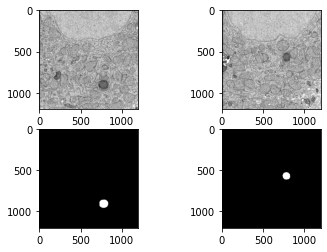

538 648


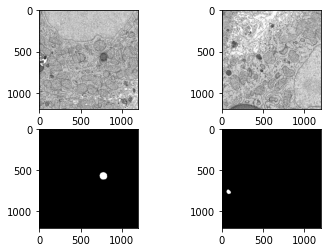

648 649


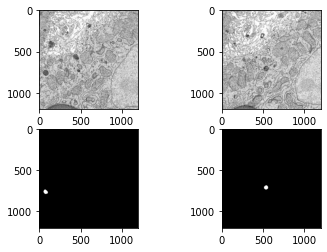

649 650


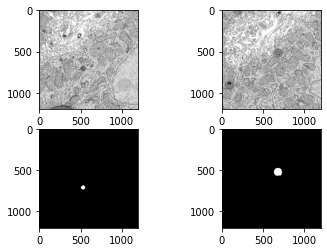

650 652


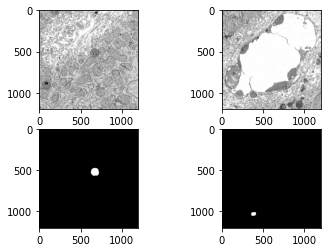

652 697


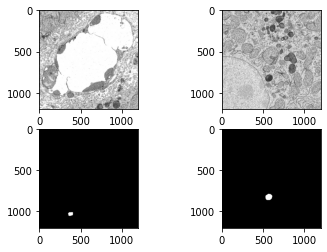

697 702


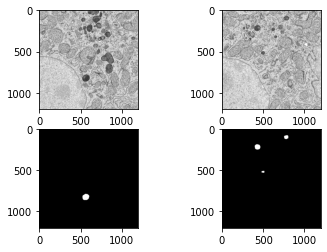

702 706


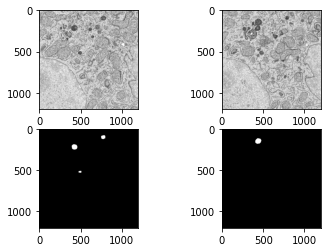

706 712


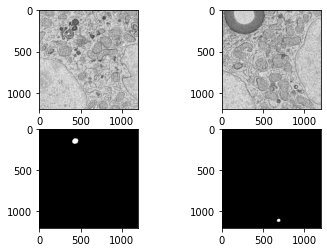

712 713


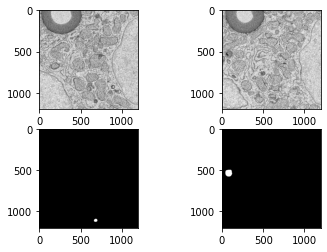

713 719


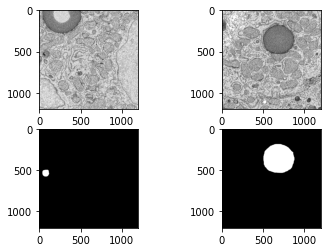

719 824


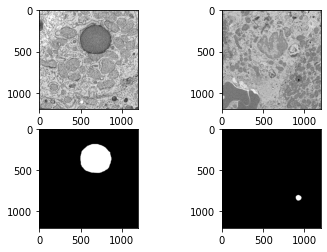

824 830


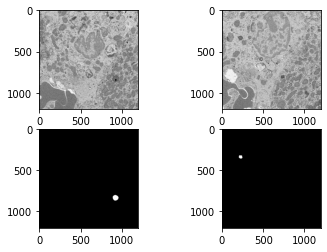

830 947


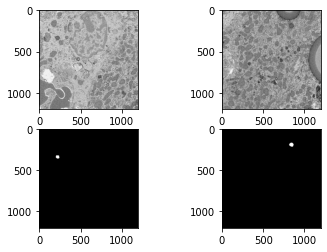

947 1066


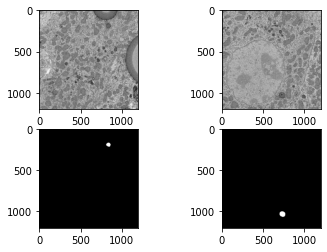

1066 1109


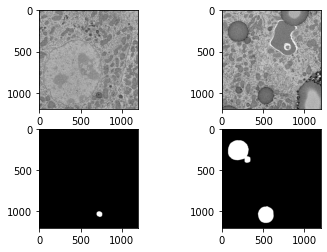

1109 1195


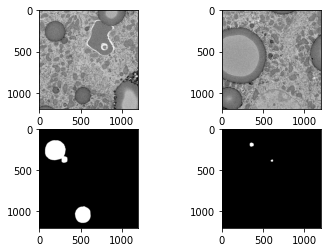

1195 1256


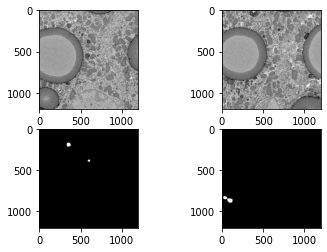

1256 1383


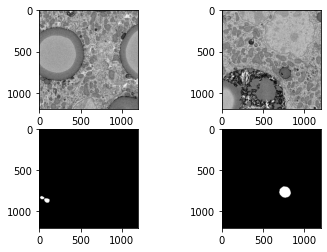

1383 1436


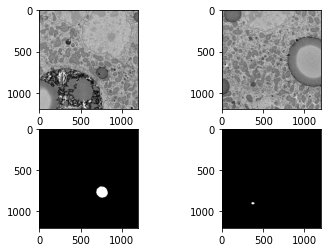

1436 1778


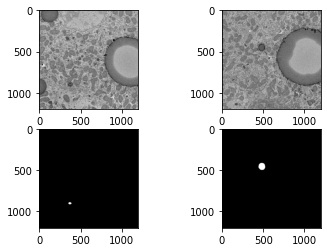

1778 1863


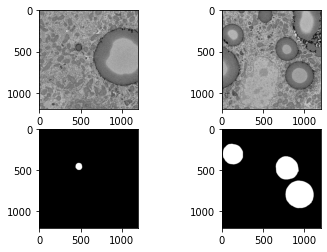

1863 1931


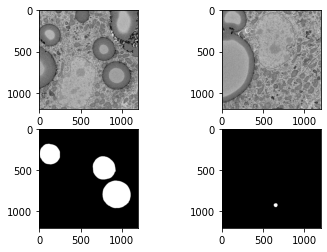

1931 2023


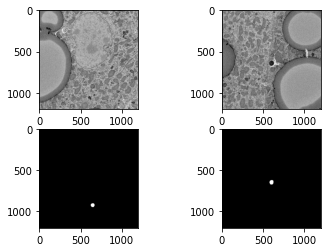

2023 2036


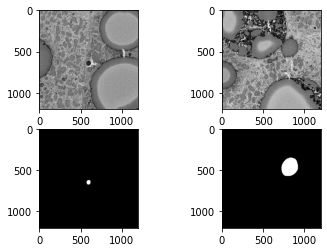

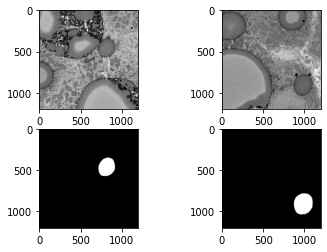

In [ ]:
for i in range(len(image_stacks)):
  start, end = image_stacks[i]
  print(start, end)
  show_image_pairs(start, end)

show_image_pairs(end, len(image_file_list)-1)

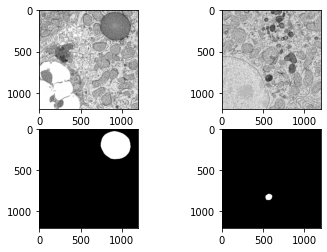

In [ ]:
show_image_pairs(696, 697)

## Make image stacks



In [ ]:
split1 = math.floor(len(image_file_list)*0.3)
print(split1)

for i in range(len(image_stacks)):
  start, end = image_stacks[i]
  if start <= split1 < end:
    print(i)
    break

print(start, end)

702
11
652 719


In [ ]:
end-start, image_stacks[10][1]-image_stacks[10][0]

(67, 150)

In [ ]:
split1-start, end-split1

(50, 17)

In [ ]:
# first ~30% to be test set and the rest is for training set

In [ ]:
# split the data into x% for training and y% for validation and z% for testing
# in some cases validation set might not be needed then can leave it out
# the validation split will be False by default
# train_ratio -> between 0 and 0.9
def split_data(image_file_list, mask_file_list, train_ratio=0.7, test_ratio=0.3, val_split=True):
  # check each ratio is within 0 and 1, and sum is 1
  #if val_split == True:
    
  assert 0 < train_ratio < 1, "train_ratio must be between 0 and 1"
  assert 0 < test_ratio < 1, "test_ratio must be between 0 and 1"
  assert train_ratio + test_ratio <= 1, "sum of train_ratio and test_ratio must be less than 1"

  total_sample = len(image_file_list)
  split1 = math.ceil(total_sample*train_ratio)
  split2 = math.ceil(total_sample*(train_ratio + test_ratio))
  # hard coded for now; need to create a function to check for the images distribution to prevent leakage
  print(split1, split2)

  training_images = image_file_list[0:split1]
  training_masks = mask_file_list[0:split1]
  training_set = {'images': training_images,
                  'masks': training_masks}

  if val_split:
    val_images = image_file_list[split1:split2]
    val_masks = mask_file_list[split1:split2]
    val_set = {'images': val_images,
                    'masks': val_masks}

    test_images = image_file_list[split2:]
    test_masks = mask_file_list[split2:]

  else:
    val_set = {'images': [],
                    'masks': []}

    test_images = image_file_list[split1:]
    test_masks = mask_file_list[split1:]

  test_set = {'images': test_images,
                  'masks': test_masks}

  return training_set, val_set, test_set




In [ ]:
# split the data into 70:0:30
training_set, val_set, test_set = split_data(image_file_list, mask_file_list, train_ratio = 0.7, test_ratio = 0.3, val_split = False)


print(len(training_set['images']), 
len(training_set['masks']) )

print(len(val_set['images']), 
len(val_set['masks']) )

print(len(test_set['images']), 
len(test_set['masks']) )

In [ ]:
image_stacks = [[0, 6],
 [6, 10],
 [10, 60],
 [60, 85],
 [85, 88],
 [88, 148],
 [148, 337],
 [337, 451],
 [451, 472],
 [472, 502],
 [502, 652],
 [652, 719],
 [719, 824],
 [824, 1109],
 [1109, 1383],
 [1383, 1778],
 [1778, 1863],
 [1863, 2023],
 [2023, 2036],
 [2036, 2341]]

In [ ]:
for start, end in image_stacks:
  print(start, end, ": ", end-start)

0 6 :  6
6 10 :  4
10 60 :  50
60 85 :  25
85 88 :  3
88 148 :  60
148 337 :  189
337 451 :  114
451 472 :  21
472 502 :  30
502 652 :  150
652 719 :  67
719 824 :  105
824 1109 :  285
1109 1383 :  274
1383 1778 :  395
1778 1863 :  85
1863 2023 :  160
2023 2036 :  13
2036 2341 :  305
